In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

In [2]:
df= pd.read_csv("/Users/sa10/Downloads/house-prices-advanced-regression-techniques/House-Prices-Portfolio-Project/data/new_df.csv")

In [3]:
df.shape

(1378, 66)

In [4]:
warnings.filterwarnings('ignore')

X = df.drop(columns='SalePrice')
y = df['SalePrice']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [5]:
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)  # 0.25 x 0.8 = 0.2

print(f"Train shape: {X_train.shape}, Validation shape: {X_valid.shape}, Test shape: {X_test.shape}")

Train shape: (826, 65), Validation shape: (276, 65), Test shape: (276, 65)


In [6]:
# train and evaluate Random Forest Regressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
y_pred_rfr = model_RFR.predict(X_valid)
print("Random Forest MAE:", mean_absolute_error(y_valid, y_pred_rfr))

Random Forest MAE: 20403.970724637682


In [7]:
# train and evaluate Gradient Boosting Regressor
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, y_train)
y_pred_gbr = model_GBR.predict(X_valid)
print("Gradient Boosting MAE:", mean_absolute_error(y_valid, y_pred_gbr))

Gradient Boosting MAE: 19900.30387863868


In [8]:
from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03, n_estimators=200, objective='reg:squarederror')
model_XGBR.fit(X_train, y_train)
y_pred = model_XGBR.predict(X_valid)
print("XGBoost MAE:", mean_absolute_error(y_valid, y_pred))

XGBoost MAE: 21525.761945199276


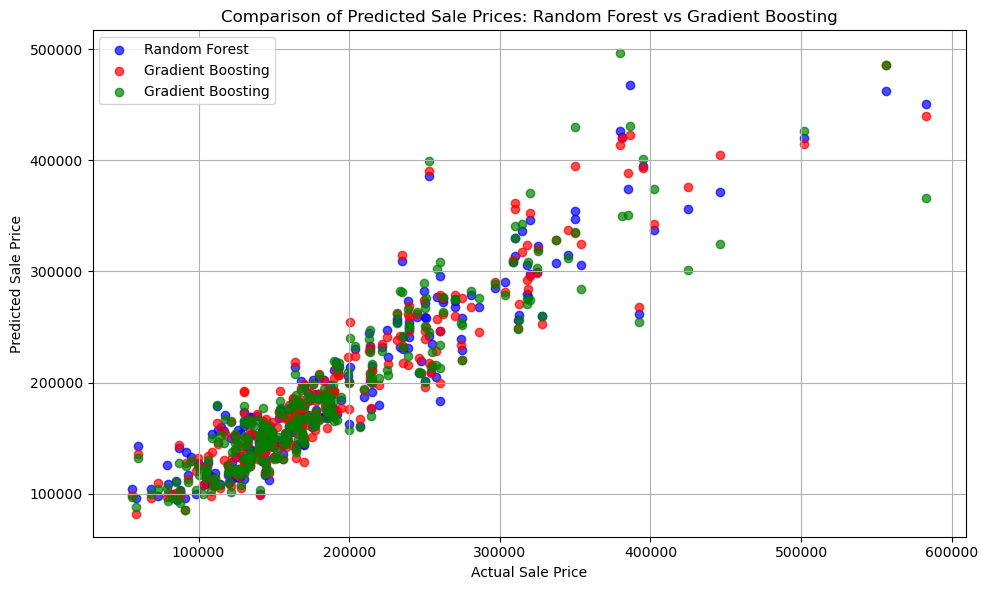

In [9]:
plt.figure(figsize=(10, 6))
plt.title('Comparison of Predicted Sale Prices: Random Forest vs Gradient Boosting')
plt.scatter(y_valid, model_RFR.predict(X_valid), alpha=0.7, label='Random Forest', color='blue')
plt.scatter(y_valid, model_GBR.predict(X_valid), alpha=0.7, label='Gradient Boosting', color='red')
plt.scatter(y_valid, model_XGBR.predict(X_valid), alpha=0.7, label='Gradient Boosting', color='green')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()